The following dataset is used for clustering. Clustering is an unsupervise dlearning in which no labeled data is required. The following data set consists of two attributes . One is how many packets are sent per user and the other is what is the size of that packet.Now let us do the clustering.


# 1. K means clustering 

In [199]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [200]:
def load_dataset(name):
    return np.loadtxt(name)
#for each user how many packets are sent per second and what is their size.


In [201]:
def euclidian(a, b):
    return np.linalg.norm(a-b)
#taking euclidien distance or the "ordinary" straight-line distance between two points in Euclidean space.

The algorithm for K means clustering goes like this:
we are defining hyper parameters where k=number of clusters
epsilon=threshold that is minimum error to be used in training the model.And the distance which is eculidein. Alogrithm is explained step by step below.

In [202]:
def kmeans(k, epsilon=0, distance='euclidian'):
    #store the past centroids for us to graph centroids move.
    history_centroids = []
     
    if distance == 'euclidian':
        dist_method = euclidian
    #load the data
    dataset = load_dataset('C:/Users/gaura/Documents/clustering data.txt')
    # dataset = dataset[:, 0:dataset.shape[1] - 1]
    # rows are the number of datapoints we have and columns are the nu,ber of features we have
    num_instances, num_features = dataset.shape
    #define k centroids. Randomly plotting k centroids
    prototypes = dataset[np.random.randint(0, num_instances - 1, size=k)]
    #setting prototypes to the history for keeping a copy.
    history_centroids.append(prototypes)
    #to keep track of centroid at every iteration
    prototypes_old = np.zeros(prototypes.shape)
    #to store clusters
    belongs_to = np.zeros((num_instances, 1))
    #distance between current prototype and old prototype is stored in norm
    norm = dist_method(prototypes, prototypes_old)
    iteration = 0
    #training
    while norm > epsilon:
        iteration += 1
        #started training
        norm = dist_method(prototypes, prototypes_old)
        prototypes_old = prototypes
        for index_instance, instance in enumerate(dataset):
            dist_vec = np.zeros((k, 1))
            for index_prototype, prototype in enumerate(prototypes):
                dist_vec[index_prototype] = dist_method(prototype,
                                                        instance)

            belongs_to[index_instance, 0] = np.argmin(dist_vec)

        tmp_prototypes = np.zeros((k, num_features))

        for index in range(len(prototypes)):
            instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
            prototype = np.mean(dataset[instances_close], axis=0)
            # prototype = dataset[np.random.randint(0, num_instances, size=1)[0]]
            tmp_prototypes[index, :] = prototype

        prototypes = tmp_prototypes

        history_centroids.append(tmp_prototypes)

    # plot(dataset, history_centroids, belongs_to)

    return prototypes, history_centroids, belongs_to


In [203]:
#the plotting algorithm
def plot(dataset, history_centroids, belongs_to):
    #two colors red and green
    colors = ['r', 'g']

    #split our graph by its axis and actual plot
    fig, ax = plt.subplots()

    #for each point in our dataset
    for index in range(dataset.shape[0]):
        #get all the points assigned to a cluster
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        #assign each datapoint in that cluster a color and plot it
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    #lets also log the history of centroids calculated via training
    history_points = []
    #for each centroid ever calculated
    for index, centroids in enumerate(history_centroids):
        #print them all out
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))

                plt.show()

In [207]:
#excecution
def execute(n_clusters):
    #load dataset
    dataset = load_dataset('C:/Users/gaura/Documents/clustering data.txt')
    #training the model
    centroids, history_centroids, belongs_to = kmeans(n_clusters)
    #results
    plot(dataset, history_centroids, belongs_to)
    return [dataset, history_centroids, belongs_to]

<IPython.core.display.Javascript object>


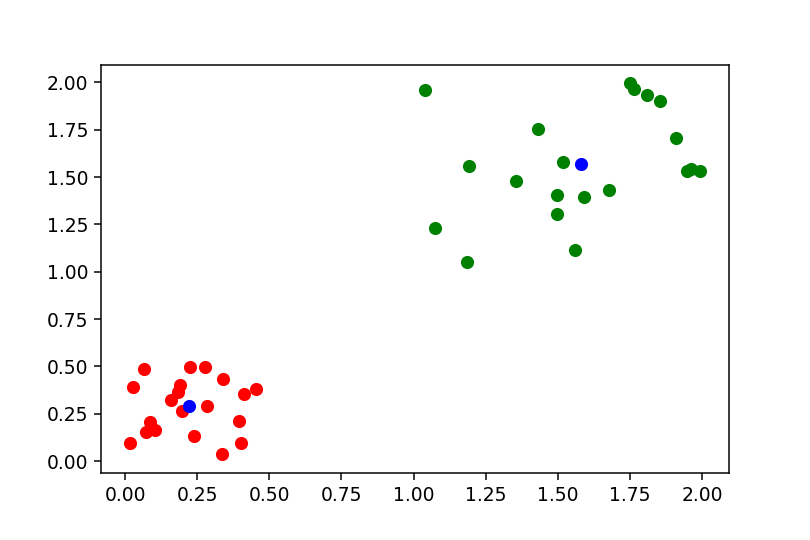

centroids 1 [ 0.13048098  0.29016883]
centroids 1 [ 1.23257468  1.20319806]
centroids 2 [ 0.22331067  0.28960446]
centroids 2 [ 1.58058247  1.56897412]
centroids 3 [ 0.22331067  0.28960446]
centroids 3 [ 1.58058247  1.56897412]
centroids 4 [ 0.22331067  0.28960446]
centroids 4 [ 1.58058247  1.56897412]


In [208]:
%matplotlib notebook

#final excecution and getting the centroids 
params=execute(2)

In [209]:
%matplotlib notebook
def plot_step_by_step(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']

    fig, ax = plt.subplots()

    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    history_points = []
    for index, centroids in enumerate(history_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))
                
                plt.pause(0.8)

<IPython.core.display.Javascript object>


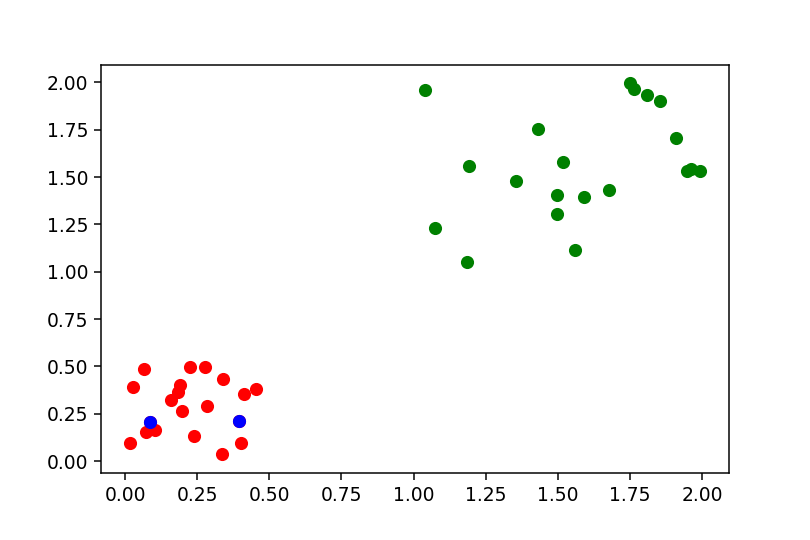

<IPython.core.display.Javascript object>


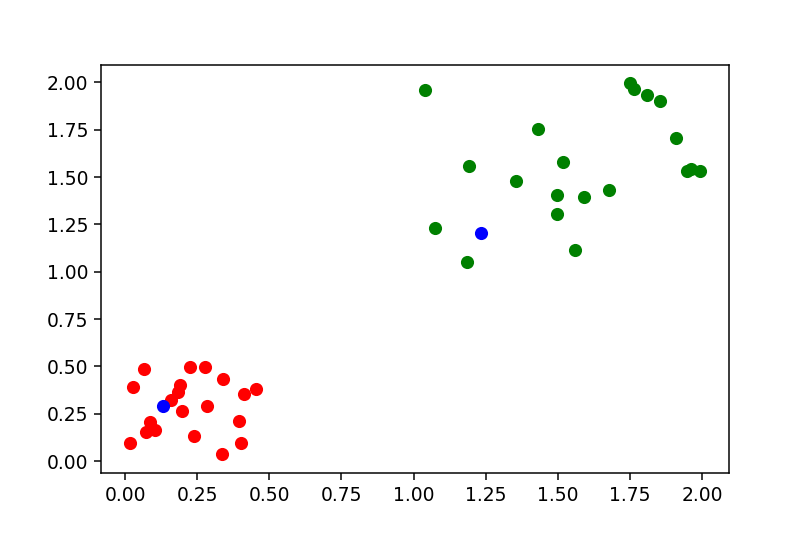

<IPython.core.display.Javascript object>


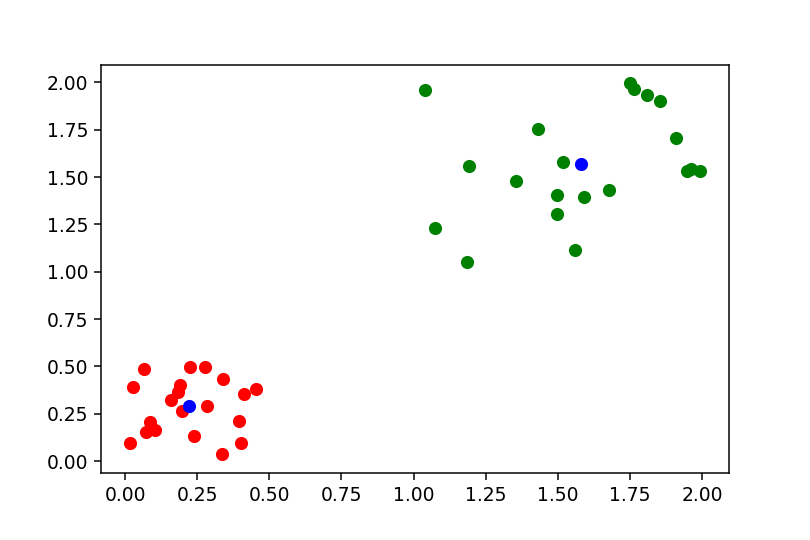

<IPython.core.display.Javascript object>


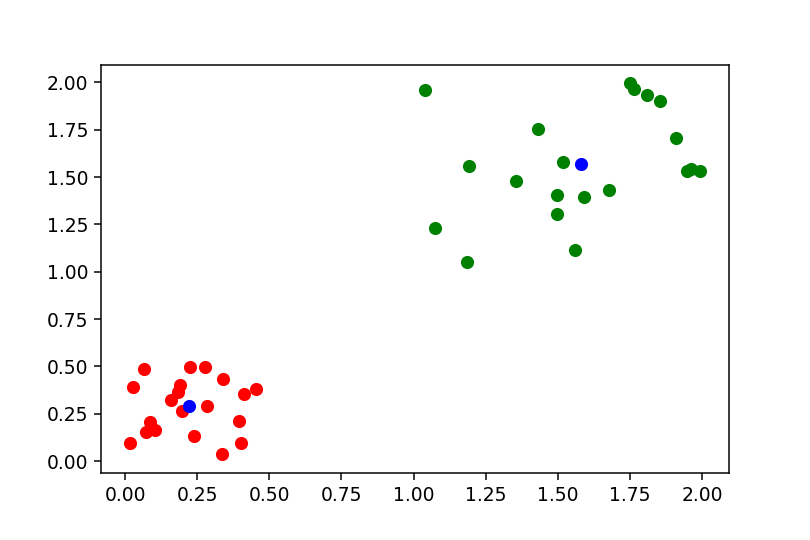

<IPython.core.display.Javascript object>


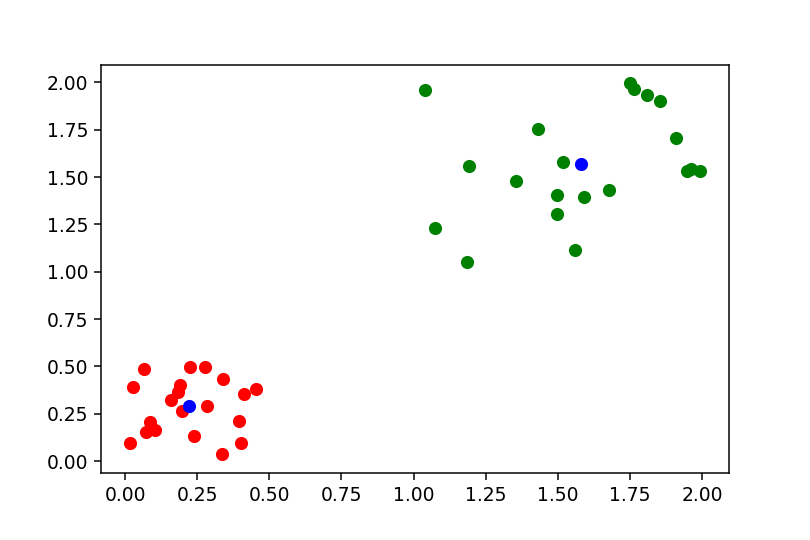

In [210]:
for item in params[1]:
    plot_step_by_step(params[0], [item], params[2])

In [211]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal

# 2.Density based clustering DBSCAN

In [212]:
def random_clusters(c=2,n=333,m=0.0, cv=1.0):
    data = []
    m=m-5.0 
    cv=cv-1.0     
    flip=True
    for i in range(1,c+1):
      m=m+5.0
      me=m   
      if flip:
        me=-1.0*me
      flip = not flip        
      cv=cv+1.0    
      if random.random() < 0.7:   
        dist = multivariate_normal(mean=[m,me], cov=[[cv,(random.random()*cv)],[(random.random()*cv)]])
      elif random.random() < 0.3:   
        dist = multivariate_normal(mean=[me,m], cov=[[cv,0.0],[0.0,cv]])
      else:   
        dist = multivariate_normal(mean=[m,m])
      for j in range(n):
        data.append(np.append(np.array(i),dist.rvs()))   
    df = pd.DataFrame(data, columns=["Column1","Column2"]) 
    df[['d']] = df[['d']].astype(int)
    return df

In [213]:
def num_to_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

In [214]:
DBSCAN(D, eps, MinPts) {
    C = 0
    for each point P in dataset D {
       if P is visited
          continue next point
       mark P as visited
       NeighborPts = regionQuery(P, eps)
       if [[sizeof]](NeighborPts) < MinPts
          mark P as NOISE
       else {
          C = next cluster
          expandCluster(P, NeighborPts, C, eps, MinPts)
       }
    }
 }

 expandCluster(P, NeighborPts, C, eps, MinPts) {
    add P to cluster C
    for each point P' in NeighborPts { 
       if P' is not visited {
          mark P' as visited
          NeighborPts' = regionQuery(P', eps)
          if [[sizeof]](NeighborPts') >= MinPts
             NeighborPts = NeighborPts joined with NeighborPts'
       }
       if P' is not yet member of any cluster
          add P' to cluster C
    }
 }

 regionQuery(P, eps)
    return all points within P's eps-neighborhood (including P)

SyntaxError: invalid syntax (<ipython-input-214-47ca37c55c5a>, line 1)

In [215]:
dataset = load_dataset('C:/Users/gaura/Documents/clustering data.txt')

db = DBSCAN(eps=0.5, min_samples=10).fit(dataset)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

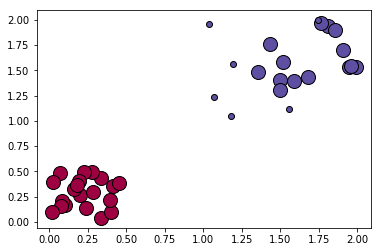

In [216]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = dataset[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = dataset[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

#plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

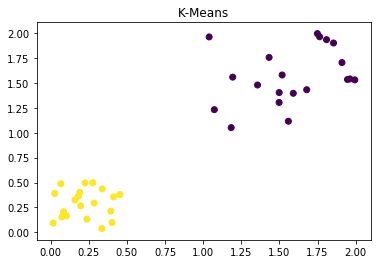

In [223]:
df = pd.DataFrame(dataset, columns=["Column1","Column2"])
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10).fit_predict(df)
plt.scatter(df['Column1'], df['Column2'], c=kmeans)
plt.title("K-Means")
plt.show()

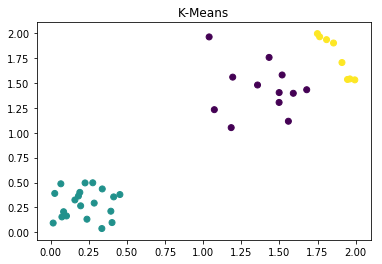

In [224]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10).fit_predict(df)
plt.scatter(df['Column1'], df['Column2'], c=kmeans)
plt.title("K-Means")
plt.show()

The dataset I have selected has two well defined regions on the 2d graph plot. The clustering for kmeans with k=2 and dbscan give the same clusters. This is because the dataset is clearly divided into two regions in the bottom left and the top right of the graph. When we do k-means with k=3 however, the topleft cluster is divided into 2 finer clusters.

Scaling of the dataset will effect the clusters and addition of more datapoints in the dataset will give rise to new cluster regions.

The clustering methods do produce interesting groupings as the dataset has clearly defined separate clusters in two regions in the plot above. 